# Anomaly Detection

Carefully choose features to detect anomaly distributoin
1. Try to convert distribution of each feature in training set to gaussian distribution by using log,sqrt,etc transformations. (Skip this step if it is already in gaussian distribution). <br>
2. Calculate mu(mean) and var(variance) of training set. <br>
3. For row 1 in validation set, calculate p (probability of density function) with mu and var of training set for each feature: <br>
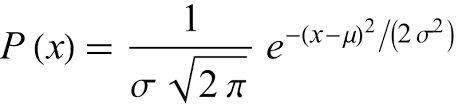

<br>
4. p = p(feature 1) * p (feature 2) * ... * p(feature n) <br>
5. Now select a threshold and if p is less than threshold then it is anomaly, otherwise its not an anomaly.<br>
6. Do this for all rows

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimate_gaussian(X):
    m,n=X.shape

    #mu = mean
    #mu = np.mean(X,axis=0)
    #OR
    mu=1/m * np.sum(X,axis=0) 
    print(mu)

    #var=variance
    #var = np.var(X,axis=0)
    #OR
    var=1/m* np.sum((X-mu)**2,axis=0)
    print(var)
    
    return mu,var

In [3]:
def my_multivariate_gaussian(X,mu,var):
    #Here are 2 implementations, first one with loop and other without loop and optimized
    m,n=X.shape
    
    # 1: With loop
    #probability=np.ones((m,))
    #for i in range(m):   
    #    for j in range(n):
    #        probability[i]*=1/np.sqrt(2*np.pi*var[j]) * np.exp(-(X[i][j]-mu[j])**2/(2*var[j]))
        
    # 2: Without loop  Best optimized 
    probability=np.prod(1/np.sqrt(2*np.pi*var) * np.exp(-(X-mu)**2/(2*var)),axis=1)
    
    return probability

In [4]:
def select_threshold(p,y_val):
    best_epsilon=0
    best_f1=0
    f1=0

    step_size=(np.max(p) - np.min(p) )/1000

    for epsilon in np.arange(np.min(p),np.max(p),step_size):
        predictions=p<epsilon
        tp=np.sum((predictions==1) & (y_val==1))
        fp=np.sum((predictions==1) & (y_val==0))
        fn=np.sum((predictions==0) & (y_val==1))

        precision=tp/(tp+fp)
        recall=tp/(tp+fn)

        f1=2*precision*recall/(precision+recall)

        #OR directly run sklearn.metrics.f1_score library

        if f1>best_f1:
            best_f1=f1
            best_epsilon=epsilon

    return best_epsilon,best_f1

In [5]:
X_train=np.load('../input/anomaly-detection-gaussian-distribution/X_part1.npy')
X_val=np.load('../input/anomaly-detection-gaussian-distribution/X_val_part1.npy')
y_val=np.load('../input/anomaly-detection-gaussian-distribution/y_val_part1.npy')

In [6]:
X_train.shape

(307, 2)

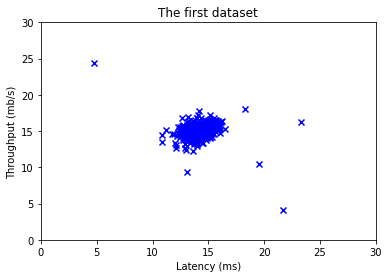

In [7]:
plt.scatter(X_train[:,0],X_train[:,1],marker='x',c='b')

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

In [8]:
mu,var=estimate_gaussian(X_train)

[14.11222578 14.99771051]
[1.83263141 1.70974533]


In [9]:
p=my_multivariate_gaussian(X_val,mu,var)
p1=my_multivariate_gaussian(X_train,mu,var)

In [10]:
epsilon,f1=select_threshold(p,y_val)
epsilon,f1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


(8.990852779269493e-05, 0.8750000000000001)

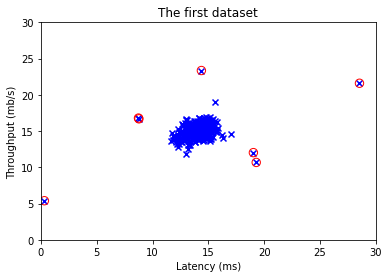

In [11]:
#Outliers in validation set
plt.scatter(X_val[:,0],X_val[:,1],marker='x',c='b')
plt.scatter(X_val[p<epsilon,0],X_val[p<epsilon,1],marker='o',facecolor="none",edgecolor="r",s=70)

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

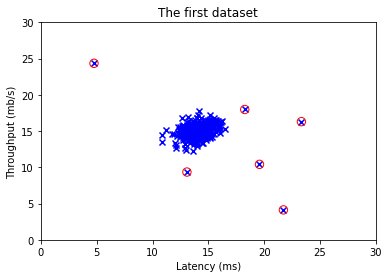

In [12]:
#Outliers in training set
plt.scatter(X_train[:,0],X_train[:,1],marker='x',c='b')
plt.scatter(X_train[p1<epsilon,0],X_train[p1<epsilon,1],marker='o',facecolor="none",edgecolor="r",s=70)

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()